In [1]:
DATA_DIR = '/d2/caches/kaggle-planet'
DATA_DIR_TRAIN = DATA_DIR + '/train-tif-v2'
DATA_DIR_TEST = DATA_DIR + '/test-tif-v2'
TEST_FILE = DATA_DIR_TRAIN + '/train_9.tif'

In [19]:
import os
from tqdm import tqdm
import rasterio
import warnings 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
def read_geotiff(path):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        with rasterio.open(path) as src:
            b, g, r, nir = src.read()
            return np.dstack([r, g, b, nir])

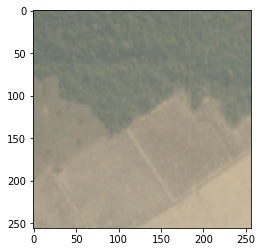

In [4]:
plt.imshow(plt.imread('/datasets/kaggle/planet/train-jpg/train_9.jpg'))

In [5]:
d = read_geotiff(TEST_FILE)

In [6]:
rgb = d[:,:,:3]
r = d[:,:,0]
g = d[:,:,1]
b = d[:,:,2]
nir = d[:,:,3]

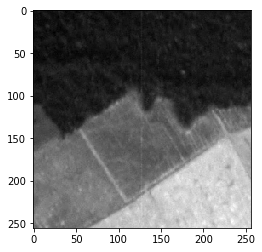

In [7]:
plt.imshow(r, cmap=plt.cm.gray)

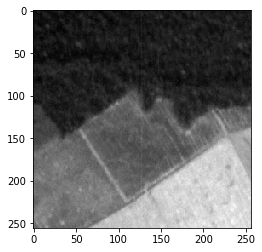

In [8]:
plt.imshow(g, cmap=plt.cm.gray)

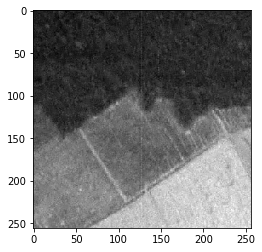

In [9]:
plt.imshow(b, cmap=plt.cm.gray)

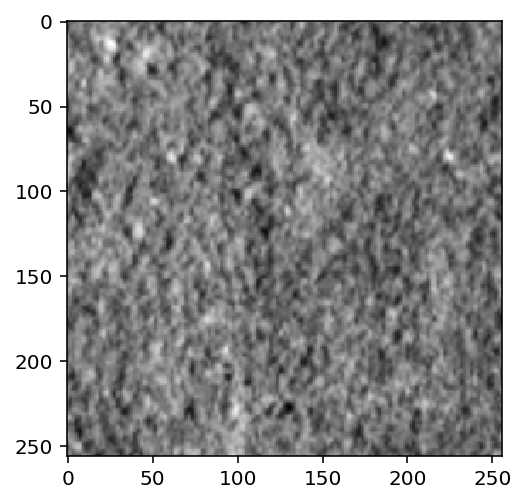

In [21]:
plt.imshow(nir, cmap=plt.cm.gray)

In [11]:
# get files in directory
def get_files(src_dir):
    f = []
    for (dirpath, dirnames, filenames) in os.walk(src_dir):
        f.extend(filenames)
    return f

In [12]:
train_files = (get_files(DATA_DIR + '/train-tif-v2'))

In [13]:
mr = np.zeros(len(train_files), dtype=np.int16)
mg = np.zeros(len(train_files), dtype=np.int16)
mb = np.zeros(len(train_files), dtype=np.int16)
mnir = np.zeros(len(train_files), dtype=np.int16)
i = 0

for f in tqdm(train_files):
    f = DATA_DIR_TRAIN + '/' + f
    d = read_geotiff(f)
    
    r = d[:,:,0]
    g = d[:,:,1]
    b = d[:,:,2]
    nir = d[:,:,3]
    
    mr[i] = np.max(r)
    mg[i] = np.max(g)
    mb[i] = np.max(b)
    mnir[i] = np.max(nir)
        
    i += 1

100%|██████████| 40479/40479 [12:06<00:00, 55.69it/s]


In [14]:
print(mr, mg, mb, mnir)

[7405 3210 5824 ..., 2404 9148 3618] [ 7423  4580  6773 ...,  3487 10126  4471] [ 8089  5444  7635 ...,  4170 11464  5244] [ 9483 10248  6437 ...,  8533 10834 10585]


(array([  1.80060000e+04,   1.15740000e+04,   5.63400000e+03,
          2.60000000e+03,   1.34900000e+03,   6.99000000e+02,
          4.35000000e+02,   1.38000000e+02,   4.10000000e+01,
          3.00000000e+00]),
 array([  1406. ,   4209.7,   7013.4,   9817.1,  12620.8,  15424.5,
         18228.2,  21031.9,  23835.6,  26639.3,  29443. ]),
 <a list of 10 Patch objects>)

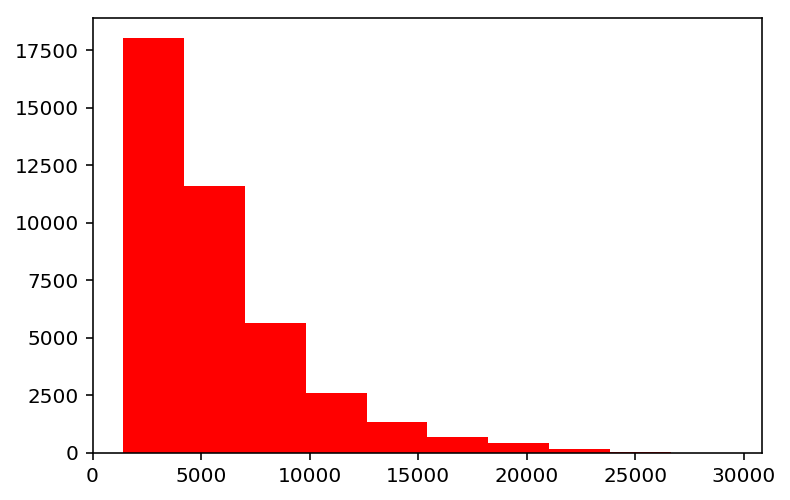

In [22]:
plt.hist(mr, color='red')

(array([  1.04290000e+04,   1.47700000e+04,   7.18000000e+03,
          3.30300000e+03,   1.82800000e+03,   1.56200000e+03,
          1.07600000e+03,   2.78000000e+02,   4.80000000e+01,
          5.00000000e+00]),
 array([  2100.,   4355.,   6610.,   8865.,  11120.,  13375.,  15630.,
         17885.,  20140.,  22395.,  24650.]),
 <a list of 10 Patch objects>)

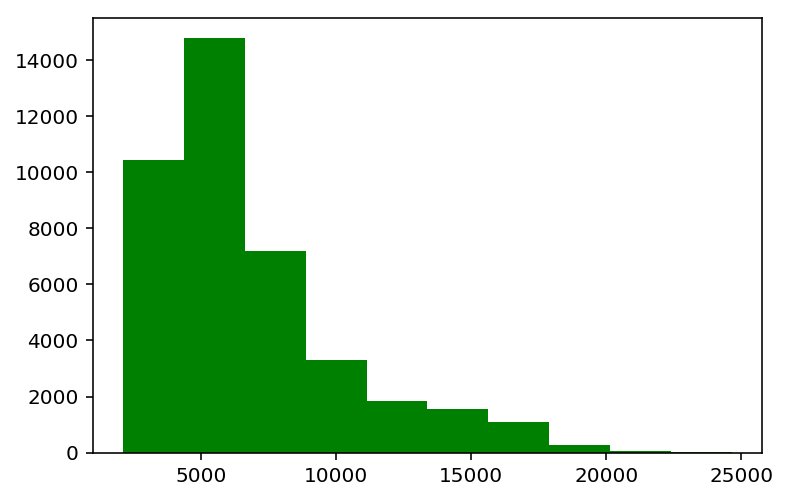

In [23]:
plt.hist(mg, color='green')

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.11600000e+04,
          1.53430000e+04,   2.97900000e+03,   7.97000000e+02,
          1.98000000e+02]),
 array([-32174. , -25728.1, -19282.2, -12836.3,  -6390.4,     55.5,
          6501.4,  12947.3,  19393.2,  25839.1,  32285. ]),
 <a list of 10 Patch objects>)

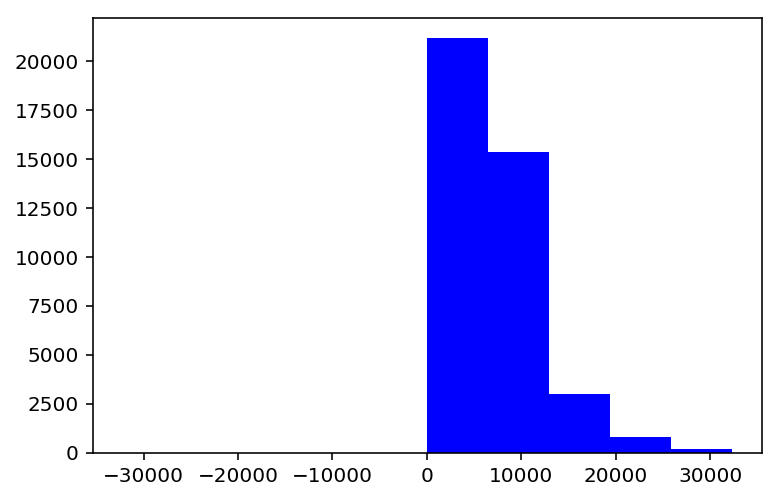

In [24]:
plt.hist(mb, color='blue')

(array([  2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

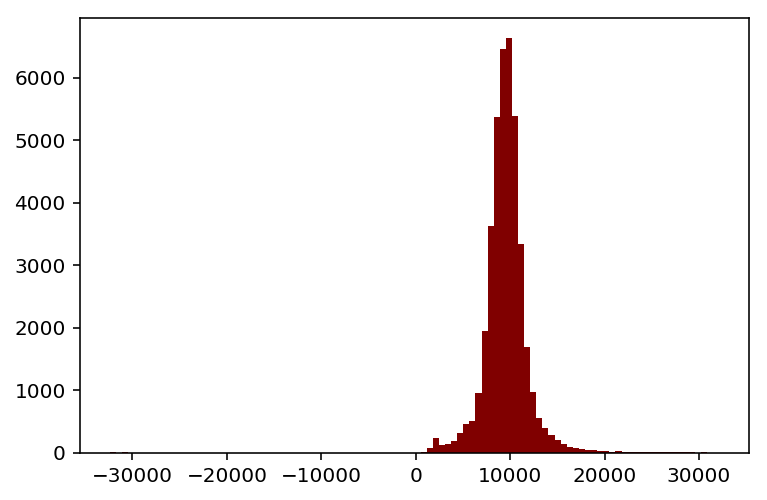

In [38]:
plt.hist(mnir, color='maroon', bins=100)

In [44]:
min(mnir)

-32359

In [45]:
max(mnir)

32115

In [49]:
bin(-(0xffff >> 1))

'-0b111111111111111'

In [51]:
min(mr)

1406

In [52]:
max(mr)

29443

In [53]:
min(mb)

-32174

In [54]:
max(mb)

32285